# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [3]:
test = np.load("./Data/test_images.npy")
test.shape

(10000, 28, 28)

In [4]:
train = np.load("./Data/train_images.npy")
train.shape

(60000, 28, 28)

In [5]:
labels = pd.read_csv("./Data/train_labels.csv")
labels.shape

(60000, 1)

In [6]:
train_X = train[:50000]
test_X = train[50000:]
train_y = labels[:50000].to_numpy()
test_y = labels[50000:].to_numpy()

Text(0.5, 1.0, 'Data Distribution')

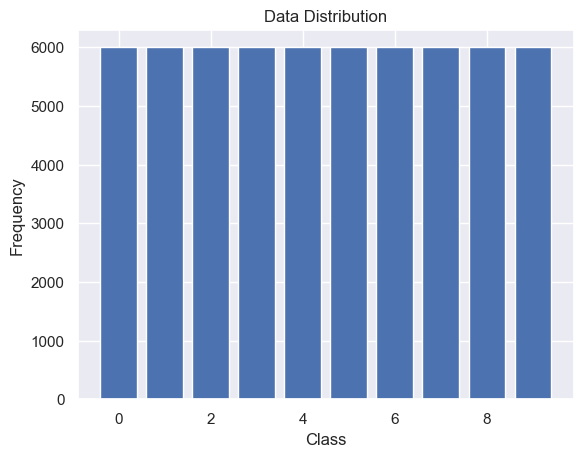

In [7]:
classes, frequency = np.unique(labels, return_counts=True)
plt.bar(classes, frequency)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data Distribution")

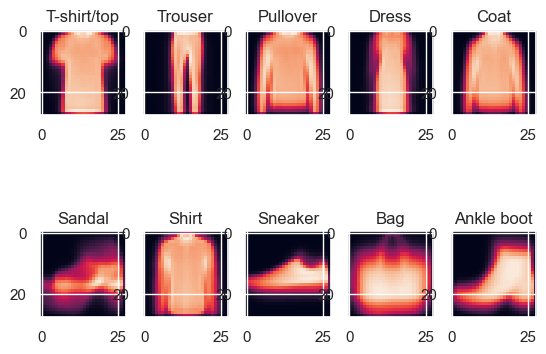

In [8]:
fig, axs = plt.subplots(2, 5)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
meanImg = [train[labels.label.values == k].mean(axis=0).reshape(28,28) for k in range(10)]
for i in range(2):
    for j in range(5):
        axs[i][j].set_title(classes[5*i+j])
        axs[i][j].imshow(meanImg[5*i+j])

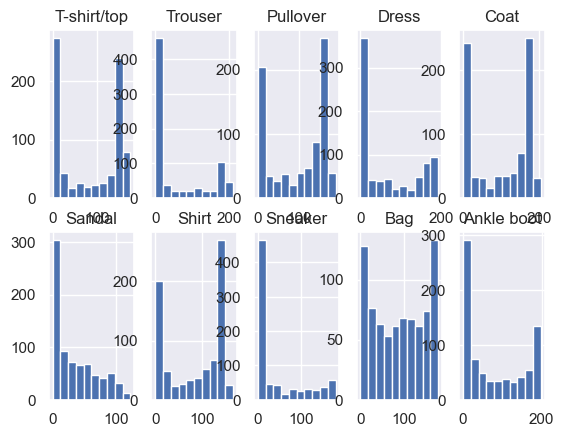

In [10]:
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axs[i][j].set_title(classes[5*i+j])
        lst = meanImg[5*i+j].flatten()
        axs[i][j].hist(lst)

Extra Analysis

In [11]:
data = train / 255.0
target = labels
data.shape

(60000, 28, 28)

In [292]:
import umap

embedding = umap.UMAP().fit_transform(data, y=target)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: 'c' argument has 7840000 elements, which is inconsistent with 'x' and 'y' with size 28.

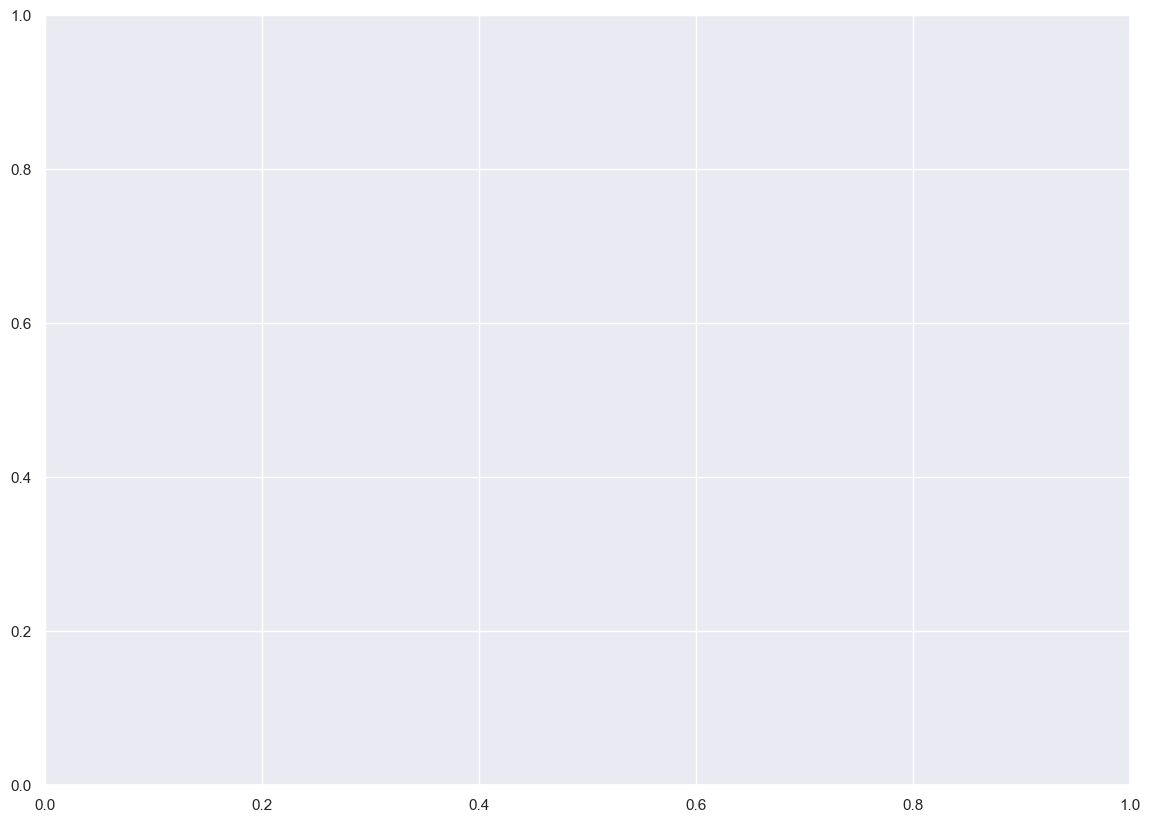

In [276]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');

# Model Exploration

In [93]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adafactor, Adadelta, Adamax, AdamW, Adagrad, Nadam, Ftrl
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform, RandomNormal

In [14]:
y_sparse_train = [[0 if train_y[i]!=j else 1 for j in range(len(classes))] for i in range(len(train_y))]
y_sparse_train = np.array(y_sparse_train)
y_sparse_test = [[0 if test_y[i]!=j else 1 for j in range(len(classes))] for i in range(len(test_y))]
y_sparse_test = np.array(y_sparse_test)

Base model

In [143]:
callback = EarlyStopping(monitor='accuracy', patience=3)
#initializer = RandomNormal(0,0.01)
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(40, activation="elu"))
model.add(Dense(80, activation="elu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 40)                31400     
                                                                 
 dense_67 (Dense)            (None, 80)                3280      
                                                                 
 dense_68 (Dense)            (None, 10)                810       
                                                                 
Total params: 35,490
Trainable params: 35,490
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.compile(loss = "categorical_crossentropy", optimizer=Adam(learning_rate=0.0002), metrics=["accuracy"])

In [148]:
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 32, epochs=20)

Epoch 1/40
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3529 - accuracy: 0.8722 - val_loss: 0.4753 - val_accuracy: 0.8581
Epoch 2/40
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3513 - accuracy: 0.8714 - val_loss: 0.4981 - val_accuracy: 0.8419
Epoch 3/40
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3455 - accuracy: 0.8745 - val_loss: 0.4888 - val_accuracy: 0.8575
Epoch 4/40
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3406 - accuracy: 0.8754 - val_loss: 0.4593 - val_accuracy: 0.8588
Epoch 5/40
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3396 - accuracy: 0.8770 - val_loss: 0.4966 - val_accuracy: 0.8496
Epoch 6/40
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3326 - accuracy: 0.8781 - val_loss: 0.4473 - val_accuracy: 0.8575
Epoch 7/40
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3317 - accuracy: 0.8790 - val_loss: 0.4713 - val_accuracy:

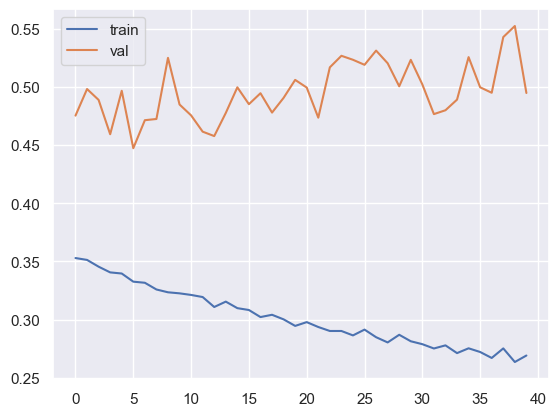

In [149]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

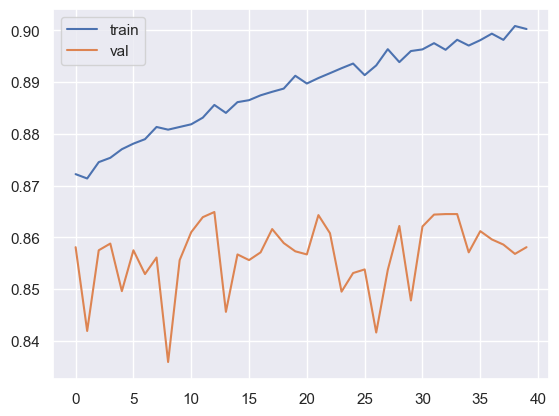

In [150]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()